In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import datetime

In [2]:
all_stock_value = pd.read_pickle("stocks_values")

In [3]:
rtalb = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == "RTALB"]

In [4]:
rtalb["HGDG_TARIH"] = pd.to_datetime(rtalb["HGDG_TARIH"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
rtalb = rtalb.sort_values(by="HGDG_TARIH")

In [6]:
rtalb.index = rtalb.HGDG_TARIH

In [7]:
rtalb.head().iloc[:,10:20]

,END_DEGER,DD_DOVIZ_KODU,DD_DT_KODU,DD_TARIH,DD_DEGER,DOLAR_BAZLI_FIYAT,ENDEKS_BAZLI_FIYAT,DOLAR_HACIM,SERMAYE,HG_KAPANIS
HGDG_TARIH,,,,,,,,,,
2014-06-02,78648.83,USD,01,1401656400000,2.0998,1.3941,0.0,5.838028e+06,5900000.0,12.55
2014-06-02,78648.83,USD,01,1401656400000,2.0998,1.3941,0.0,5.838028e+06,5900000.0,12.55
2014-06-03,78818.28,USD,01,1401742800000,2.1054,1.3405,0.0,1.603059e+06,5900000.0,12.10
2014-06-03,78818.28,USD,01,1401742800000,2.1054,1.3405,0.0,1.603059e+06,5900000.0,12.10
2014-06-04,78384.74,USD,01,1401829200000,2.1237,1.3399,0.0,2.615438e+06,5900000.0,12.20


In [698]:
stock_name = "AYES"

In [699]:
stock = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == str(stock_name)]
stock = stock.sort_values(by=["HGDG_TARIH"])
stock = stock.iloc[-400:,:]
stock.index = stock["HGDG_TARIH"]

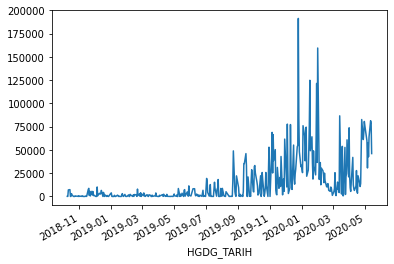

In [700]:
stock.HGDG_HACIM.plot()

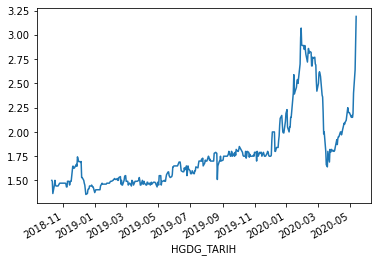

In [701]:
stock.HGDG_KAPANIS.plot()

---

In [12]:
stockNames = sm.get_stock_names()

In [104]:
graphs = []
for i in stockNames:
    stock = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == str(i)]
    stock["HGDG_TARIH"] = pd.to_datetime(stock["HGDG_TARIH"])
    stock = stock.sort_values(by="HGDG_TARIH")
    stock.index = stock.HGDG_TARIH
    graphs.append(stock.iloc[-800:,:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
names = []
maxs = []
sıras = []
market_values = []
for sıra in range(len(graphs)):
    name = graphs[sıra].HGDG_HS_KODU[0]
    max_ = sm.wealth_index(name, "01-01-2019", end_date = datetime.datetime.today().strftime("%d-%m-%Y"))
    max_.index = max_.Date
    del max_["Date"]
    market_value = graphs[sıra].iloc[-1,:]["PD"]
    if max_.max()[0] > 5:
        maxs.append(max_.max()[0])
        names.append(name)
        sıras.append(sıra)
        market_values.append(market_value)

In [117]:
dict = {'rank': sıras, 'name': names, 'max': maxs, "market_value": market_values}  
max_frame = pd.DataFrame(dict)

In [118]:
max_frame.sort_values(by="market_value")

,rank,name,max,market_value
10,81,ISKUR,10.390519,0.000000e+00
3,32,ATSYH,9.111111,1.312000e+07
24,168,SNKRN,6.600000,2.255250e+07
28,213,EGCEY,5.791667,2.780000e+07
50,360,EGCYO,11.461538,3.278000e+07
17,124,EGCYH,8.900000,3.560000e+07
42,315,BALAT,10.000000,3.576763e+07
55,395,UZERB,8.883333,4.264000e+07
1,25,DAGHL,5.435644,4.881600e+07
48,351,BMELK,10.666667,7.055000e+07


In [119]:
sıra = 379

In [120]:
name = graphs[sıra].HGDG_HS_KODU[0]
print(name)

RYSAS


In [121]:
graphs[sıra]

,HGDG_HS_KODU,HGDG_TARIH,HGDG_KAPANIS,HGDG_AOF,HGDG_MIN,HGDG_MAX,HGDG_HACIM,END_ENDEKS_KODU,END_TARIH,END_SEANS,...,HG_MIN,HG_MAX,PD,PD_USD,HAO_PD,HAO_PD_USD,HG_HACIM,DOLAR_BAZLI_MIN,DOLAR_BAZLI_MAX,DOLAR_BAZLI_AOF
HGDG_TARIH,,,,,,,,,,,,,,,,,,,,,
2017-03-08,RYSAS,2017-03-08,0.90,0.896,0.89,0.90,350010.0,01,1488920400000,2,...,0.89,0.90,1.074150e+08,2.895517e+07,6.12265e+07,1.65044e+07,350010.0,0.2399,0.2426,0.2415
2017-03-09,RYSAS,2017-03-09,0.89,0.891,0.89,0.90,728919.0,01,1489006800000,2,...,0.89,0.90,1.062215e+08,2.825867e+07,6.05463e+07,1.61074e+07,728919.0,0.2368,0.2394,0.2370
2017-03-10,RYSAS,2017-03-10,0.90,0.895,0.88,0.90,490596.0,01,1489093200000,2,...,0.88,0.90,1.074150e+08,2.861958e+07,6.12265e+07,1.63132e+07,490596.0,0.2345,0.2398,0.2385
2017-03-13,RYSAS,2017-03-13,0.90,0.901,0.89,0.91,914337.0,01,1489352400000,2,...,0.89,0.91,1.074150e+08,2.867305e+07,6.12265e+07,1.63436e+07,914337.0,0.2376,0.2429,0.2405
2017-03-14,RYSAS,2017-03-14,0.82,0.825,0.81,0.85,4761523.0,01,1489438800000,2,...,0.81,0.85,9.786700e+07,2.607978e+07,5.57842e+07,1.48655e+07,4761523.0,0.2159,0.2265,0.2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,RYSAS,2020-05-07,6.60,6.616,6.42,6.84,35242881.0,01,1588798800000,2,...,6.42,6.84,7.877100e+08,1.088915e+08,5.00353e+08,6.91679e+07,35242881.0,0.8875,0.9455,0.9146
2020-05-08,RYSAS,2020-05-08,6.43,6.471,6.37,6.67,32653618.0,01,1588885200000,2,...,6.37,6.67,7.674205e+08,1.079536e+08,4.87465e+08,6.85721e+07,32653618.0,0.8961,0.9383,0.9103
2020-05-11,RYSAS,2020-05-11,6.17,6.269,6.14,6.55,54569480.0,01,1589144400000,2,...,6.14,6.55,7.363895e+08,1.040054e+08,4.67755e+08,6.60642e+07,54569480.0,0.8672,0.9251,0.8854


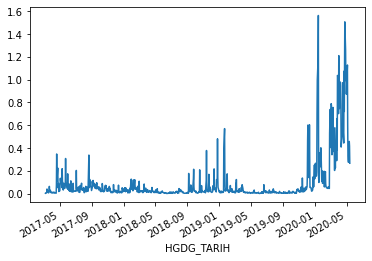

In [122]:
(graphs[sıra].HGDG_HACIM / graphs[sıra].SERMAYE).plot()

In [123]:
(graphs[sıra].HGDG_HACIM / graphs[sıra].SERMAYE).median()

0.021452978634268958

In [124]:
test = sm.wealth_index(name, "01-01-2019", end_date = datetime.datetime.today().strftime("%d-%m-%Y"))
test.index = test.Date
del test["Date"]

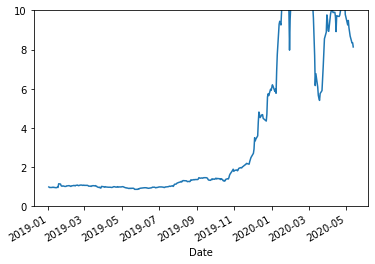

In [125]:
test.Wealth_Index.plot(ylim=(0,10))

MAALT

#### 1. hacmi aktif büyüklüğü ve özkaynak değeri ile oranla
#### 2 .hacimde gerçekten geçmişe kıyasla bir anomali mi var, yoksa söz konusu hisse için her şey normal mi? bunu değerlendiren bir fonksiyon yaz. (mesela AYGAZ son derece normal, fakat EGCYO öyle değil. Bu iki örneği baz alabilirsin).
#### 3. Backtesting yapacak bir algoritma kur
#### 4. Risklilik derecesini ölç
#### 5. Böyle bir durumda kâr zarar ihtimalini geçmiş veri üzerinden hesapla

---

In [122]:
def catch_medians(main_frame, name: str, year: int, median_multiplier: int):
    
    main_frame = pd.concat(main_frame)
    main_frame["year"] = main_frame["HGDG_TARIH"].dt.year
    main_frame = main_frame.loc[main_frame["year"] == year]
    main_frame = main_frame[main_frame["HGDG_HS_KODU"] == name]
    main_frame["volume_series"] = main_frame.HGDG_HACIM / main_frame.SERMAYE
    median = main_frame.volume_series.median()
    main_frame = main_frame.loc[main_frame.volume_series > (median*median_multiplier)]
    test_focused_dates = list(main_frame.HGDG_TARIH)
    
    return test_focused_dates 

In [123]:
stockNames = sm.get_stock_names()

In [124]:
def prepare_main_dataset(all_stock_value):
    main_frame = []
    for name in stockNames:
        stock = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == str(name)]
        stock["HGDG_TARIH"] = pd.to_datetime(stock["HGDG_TARIH"])
        stock = stock.sort_values(by="HGDG_TARIH")
        stock.index = stock.HGDG_TARIH
        main_frame.append(stock)
        
    return main_frame

In [125]:
all_stock_value = pd.read_pickle("stocks_values")

In [126]:
main_frame_ = prepare_main_dataset(all_stock_value)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [472]:
def prepare_table(main_database, name: str, days: list, year:int, median_multiplier:int):
    general = []
    for date in catch_medians(main_database, name, year, median_multiplier):
        days = days
        max_values = []
        reference_date = date
        for day in days:
            start_date = reference_date  + datetime.timedelta(days=1)
            start_date = start_date.strftime("%d-%m-%Y")
            end_date = reference_date  + datetime.timedelta(days=day)
            end_date = end_date.strftime("%d-%m-%Y")
            max_value = sm.wealth_index(name, start_date, end_date).max()[1]
            max_values.append(max_value)
        max_values.append(date)
        general.append(max_values)
        df = pd.DataFrame(general)
        columns = days + ["reference_date"]
        df.columns = columns
        df["name"] = name
    return df

In [473]:
# example
prepare_table(main_frame_, "RTALB", [7, 30, 60, 90, 120, 180], 2018, 10)

,7,30,60,90,120,180,reference_date,name
0,1.004724,1.137458,1.137458,1.137458,1.151631,1.151631,2018-08-06,RTALB
1,1.126755,1.126755,1.126755,1.140794,1.140794,1.140794,2018-08-29,RTALB
2,0.879153,0.879153,0.879153,1.012460,1.012460,1.012460,2018-08-31,RTALB
3,1.000000,1.024417,1.024417,1.185350,1.185350,1.185350,2018-09-03,RTALB
4,0.971143,1.000000,1.168247,1.168247,1.168247,1.168247,2018-09-25,RTALB
5,1.004959,1.208927,1.208927,1.208927,1.208927,1.208927,2018-11-05,RTALB
6,0.961962,1.021728,1.021728,1.021728,1.021728,1.021728,2018-12-20,RTALB
7,0.961962,1.021728,1.021728,1.021728,1.021728,1.021728,2018-12-21,RTALB


In [132]:
def prepare_all_tables(main_database, stock_names, year: int, median_multiplier: int, days: list):
    frames = []   
    for stock_name in stock_names:
        try:
            frame = prepare_table(main_database, stock_name, days, year, median_multiplier)
            frames.append(frame)
            print(stock_name)
        except:
            print(f"{stock_name} none")

    frames = pd.concat(frames)
    return frames

In [133]:
data = prepare_all_tables(main_frame_, stockNames, 2019, 10, [7, 30, 60, 90, 120, 180])

OSMEN
DURDO
AYES
BTCIM
BOLUC
ALKIM
ENKAI
ASELS none
PKENT
YGYO
GRNYO
ANELE
TLMAN
BFREN
PAGYO
KNFRT
OLMIP
POLTK
BRKSN
YKGYO
AKSEN none
ISMEN
BLCYT
EGPRO
PEGYO
INTEM
DEVA
IHGZT
CUSAN
GEDZA
YGGYO
ASUZU
DOGUB
YUNSA
MEGAP
MIPAZ
UTPYA
AKSGY
USAK
DENCM
EREGL none
LUKSK
NUGYO
PSDTC
AKFGY
ADBGR
HALKS
ARCLK none
DOHOL none
CMENT
TRCAS
DYOBY
INFO
ROYAL
MGROS
ULAS
ISBTR
KOZAA none
SELEC
BNTAS
IHLGM
EGCYH
DESPC
BRYAT
ARTI
GLYHO
BJKAS
EGGUB
AGYO
DITAS
TRKCM
MTRYO
AKENR
LINK
BIMAS none
EUYO
ADANA
FLAP
HDFGS
DGGYO
BRISA
SISE
ARDYZ none
TMSN
ULKER none
VKFYO
OYAYO
SARKY
ORGE
TAVHL none
KAREL
EGCYO
FORMT
KCHOL none
AVHOL
KPHOL
TCELL none
DESA
IHLAS
SEYKM
AYGAZ
PRKAB
KORDS none
MAALT
GLBMD
ECZYT
RAYSG
MNDRS
ZOREN
COSMO
QNBFB
AKSUE
EKIZ
QNBFL
PGSUS
DMSAS
ISGYO
RALYH
GENTS
KAPLM
BURVA
HEKTS none
AKMGY
DGATE
SOKM none
PNSUT
ALKA
VANGD
INDES
AVGYO
MPARK none
SAHOL none
GARFA
PETUN
CELHA
SELGD
BEYAZ
PRKME
ATSYH
HATEK
ISATR
GOODY
UFUK
VKGYO
DARDL
BOSSA
ADNAC
MZHLD
SAFKR none
ATLAS
THYAO none
ENJSA none
ALARK n

In [ ]:
data = data.dropna()

for i in list(data.iloc[:,:-2]):
    data[i] = data[i].astype(float)

In [135]:
# data.to_pickle("hacim_2019_median10")

In [633]:
data = pd.read_pickle("hacim_2018")

In [634]:
data.head()

,7,30,60,90,120,180,reference_date,name
0,1.020227,1.020227,1.020227,1.020227,1.020227,1.020227,2018-01-29,NUHCM
0,0.987879,0.987879,0.987879,0.987879,0.987879,0.987879,2018-02-27,KRGYO
1,1.015152,1.015152,1.075758,1.075758,1.075758,1.075758,2018-12-11,KRGYO
0,1.063166,1.178952,2.484200,10.652572,10.652572,10.652572,2018-07-31,KLNMA
1,1.269848,7.586162,7.586162,7.586162,7.586162,7.586162,2018-09-19,KLNMA


In [635]:
data.shape

(1385, 8)

In [645]:
frames = [] 
for name in stocks:
    testt = test.loc[test["name"] == str(name)]
    testtt = pd.DataFrame(testt["reference_date"].diff())
    testtt = testtt.dropna()
    
    threshold = 11 # 10 gün üstü ara 
    counter = 1
    index = 0
    target_dates = []
    for date in testtt["reference_date"]:
        index += 1
        if date < datetime.timedelta(days=threshold):
            counter+=1
            if counter >= 3:
                target_dates.append(index)
                counter = 0
        else:
            counter=0
            
    target_dates
    filter1 = testt.index.isin(target_dates) 
    testt = testt[filter1]
    frames.append(testt)

In [646]:
frames = pd.concat(frames)

In [647]:
frames

,7,30,60,90,120,180,reference_date,name
6,1.010870,1.203804,2.176630,2.176630,2.176630,2.445652,2019-12-17,OSMEN
7,0.994444,1.027778,1.027778,1.111111,1.333333,1.705556,2019-09-17,AYES
10,0.994595,0.994595,0.994595,1.172973,1.659459,1.659459,2019-10-02,AYES
13,1.000000,1.000000,1.111111,1.238889,1.705556,1.705556,2019-10-14,AYES
16,1.005714,1.028571,1.222857,1.480000,1.754286,1.754286,2019-10-24,AYES
...,...,...,...,...,...,...,...,...
28,0.978036,1.007752,1.064599,1.064599,1.064599,1.064599,2019-12-16,SANKO
31,0.997416,1.060724,1.064599,1.064599,1.064599,1.064599,2019-12-30,SANKO
9,1.011673,1.178988,1.529183,1.529183,1.529183,1.529183,2019-12-26,BASCM
6,0.962085,1.071090,1.137441,1.137441,1.137441,1.137441,2019-12-30,AKGUV


In [648]:
frames[180].mean()

2.2394077494289935

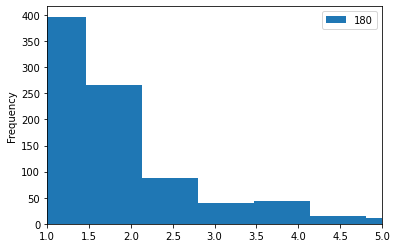

In [650]:
pd.DataFrame(frames[[180]]).plot(kind="hist", bins=50, xlim=(1,5))

In [651]:
samples = random_sampling(frames, which_day = 90, number_of_trial = 100, sample_size = 10)

In [652]:
len(samples)

100

In [653]:
means = [] 
for i in range(len(samples)):
    mean = Average(samples[i])
    means.append(mean)

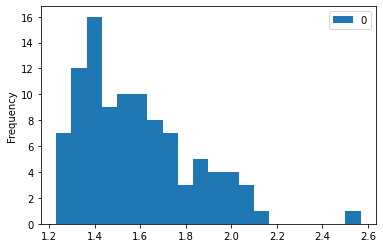

In [654]:
pd.DataFrame(means).plot(kind="hist", bins=20)

In [655]:
max(means)

2.567423710522033

In [656]:
min(means)

1.2312540811006767

In [ ]:
all_stock_values = sm.values_all_stocks()

In [626]:
frames.shape

(224, 8)

In [407]:
# ilgili yıl hisse ilk farkedildiğinde al.
frames = frames.drop_duplicates(subset=["name"])
frames.shape

(224, 8)

In [423]:
frames.sort_values(by=["reference_date"]).iloc[50:60,:]

,7,30,60,90,120,180,reference_date,name
10,1.075000,1.075000,1.075000,1.075000,1.075000,1.075000,2019-04-25,TACTR
2,1.026393,1.026393,1.026393,1.026393,1.026393,1.049853,2019-04-25,UTPYA
2,0.807823,0.807823,0.807823,0.807823,0.807823,0.830499,2019-04-26,YBTAS
4,0.922315,1.048553,1.174693,1.235900,1.383031,1.951937,2019-04-30,IHEVA
2,0.995392,0.995392,0.995392,0.995392,0.995392,0.995392,2019-04-30,GSRAY
2,1.000000,1.403509,1.449123,1.449123,1.733333,2.287719,2019-04-30,SANEL
5,0.821256,0.845411,0.845411,0.845411,0.845411,0.913043,2019-05-02,BJKAS
6,1.000000,1.000000,1.000000,1.000000,1.655172,1.655172,2019-05-16,ADESE
2,1.082902,1.541451,1.585492,1.676166,1.676166,1.676166,2019-05-24,MZHLD
10,1.012324,1.065141,1.065141,1.065141,1.065141,1.065141,2019-06-12,SEYKM


In [437]:
volats = []
names = []
for name in frames["name"]:
    vol = sm.volatility(str(name), "01-01-2018", "01-01-2019")
    volats.append(vol)
    names.append(name)

In [449]:
volats = pd.DataFrame(volats)
volats = volats.reset_index(drop=True)
names = pd.DataFrame(names)
names = names.reset_index(drop=True)

In [456]:
final_frame = pd.concat([names, volats], axis=1)

In [457]:
final_frame.columns = ["name", "volatility"]

In [503]:
frame = pd.merge(frames, final_frame, on="name", how="left")

In [504]:
frame = frame.sort_values(by=["volatility"], ascending=False)

In [505]:
frame = frame.loc[frame["volatility"]>0.04]

In [506]:
frame = frame.loc[frame[7]>1.1]

In [509]:
frame

,7,30,60,90,120,180,reference_date,name,volatility
67,1.135279,1.209549,1.209549,1.209549,1.209549,1.209549,2019-01-18,BEYAZ,0.078319
167,1.301124,2.402622,2.402622,2.402622,2.402622,2.402622,2019-10-14,KLNMA,0.073080
202,1.281310,1.537572,1.537572,1.537572,1.537572,1.537572,2019-04-17,IZTAR,0.065447
160,1.173913,2.028986,2.028986,2.072464,2.115942,2.542029,2019-01-04,NIBAS,0.062672
28,1.142857,1.142857,1.142857,1.142857,1.142857,1.142857,2019-01-16,EGCYH,0.057509
68,1.132075,1.132075,1.132075,1.132075,1.132075,1.132075,2019-01-09,ATSYH,0.051297
201,1.226537,1.669903,1.669903,1.669903,1.669903,1.669903,2019-03-19,DENGE,0.050234
193,1.104895,1.272727,1.636364,1.664336,1.664336,1.664336,2019-11-26,YAYLA,0.050124
165,1.177632,1.177632,1.210526,1.750000,1.750000,2.223684,2019-12-06,EMNIS,0.048595
34,1.149171,2.906077,4.486188,4.486188,4.486188,4.486188,2019-11-18,MTRYO,0.048500


In [512]:
frame["chng"] = frame[60] / frame[7]

In [542]:
# 60.gün itibarıyla %50 olmayanları sat.
frame_pass = frame.loc[frame["chng"]>=1.5]
frame_none = frame.loc[frame["chng"]<1.5]

In [571]:
frame_pass

,7,30,60,90,120,180,reference_date,name,volatility,chng
167,1.301124,2.402622,2.402622,2.402622,2.402622,2.402622,2019-10-14,KLNMA,0.073080,1.846575
160,1.173913,2.028986,2.028986,2.072464,2.115942,2.542029,2019-01-04,NIBAS,0.062672,1.728395
34,1.149171,2.906077,4.486188,4.486188,4.486188,4.486188,2019-11-18,MTRYO,0.048500,3.903846
58,1.587302,2.261905,3.761905,5.825397,18.968254,18.968254,2019-09-24,QNBFL,0.045125,2.370000
15,1.120000,1.146667,2.106667,3.146667,3.146667,3.146667,2019-02-26,IHGZT,0.040570,1.880952


In [543]:
frame_none

,7,30,60,90,120,180,reference_date,name,volatility,chng
67,1.135279,1.209549,1.209549,1.209549,1.209549,1.209549,2019-01-18,BEYAZ,0.078319,1.065421
202,1.281310,1.537572,1.537572,1.537572,1.537572,1.537572,2019-04-17,IZTAR,0.065447,1.200000
28,1.142857,1.142857,1.142857,1.142857,1.142857,1.142857,2019-01-16,EGCYH,0.057509,1.000000
68,1.132075,1.132075,1.132075,1.132075,1.132075,1.132075,2019-01-09,ATSYH,0.051297,1.000000
201,1.226537,1.669903,1.669903,1.669903,1.669903,1.669903,2019-03-19,DENGE,0.050234,1.361478
193,1.104895,1.272727,1.636364,1.664336,1.664336,1.664336,2019-11-26,YAYLA,0.050124,1.481013
165,1.177632,1.177632,1.210526,1.750000,1.750000,2.223684,2019-12-06,EMNIS,0.048595,1.027933
74,1.172222,1.464815,1.755556,1.755556,2.250000,2.250000,2019-11-01,BOSSA,0.048046,1.497630
103,1.150442,1.150442,1.150442,1.150442,1.150442,1.150442,2019-10-01,ITTFH,0.047999,1.000000
45,1.187500,1.187500,1.187500,1.187500,1.187500,1.187500,2019-01-16,EGCYO,0.047963,1.000000


In [544]:
frame_none['reference_date']= pd.to_datetime(frame_none['reference_date']) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [545]:
frame_none["sixty"] = frame_none["reference_date"] + datetime.timedelta(days=60)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [546]:
frame_none

,7,30,60,90,120,180,reference_date,name,volatility,chng,sixty
67,1.135279,1.209549,1.209549,1.209549,1.209549,1.209549,2019-01-18,BEYAZ,0.078319,1.065421,2019-03-19
202,1.281310,1.537572,1.537572,1.537572,1.537572,1.537572,2019-04-17,IZTAR,0.065447,1.200000,2019-06-16
28,1.142857,1.142857,1.142857,1.142857,1.142857,1.142857,2019-01-16,EGCYH,0.057509,1.000000,2019-03-17
68,1.132075,1.132075,1.132075,1.132075,1.132075,1.132075,2019-01-09,ATSYH,0.051297,1.000000,2019-03-10
201,1.226537,1.669903,1.669903,1.669903,1.669903,1.669903,2019-03-19,DENGE,0.050234,1.361478,2019-05-18
193,1.104895,1.272727,1.636364,1.664336,1.664336,1.664336,2019-11-26,YAYLA,0.050124,1.481013,2020-01-25
165,1.177632,1.177632,1.210526,1.750000,1.750000,2.223684,2019-12-06,EMNIS,0.048595,1.027933,2020-02-04
74,1.172222,1.464815,1.755556,1.755556,2.250000,2.250000,2019-11-01,BOSSA,0.048046,1.497630,2019-12-31
103,1.150442,1.150442,1.150442,1.150442,1.150442,1.150442,2019-10-01,ITTFH,0.047999,1.000000,2019-11-30
45,1.187500,1.187500,1.187500,1.187500,1.187500,1.187500,2019-01-16,EGCYO,0.047963,1.000000,2019-03-17


In [567]:
changes = []
for name, start_date, end_date in zip(frame_none.name, frame_none.reference_date, frame_none.sixty):
    start_date = start_date.strftime("%d-%m-%Y")
    end_date = end_date.strftime("%d-%m-%Y")
    start_value = sm.get_values_of_stock(str(name), str(start_date))["HGDG_KAPANIS"][1] # bir sonraki gün alınacak.
    end_value = sm.get_values_of_stock(str(name), str(end_date))["HGDG_KAPANIS"][0]
    change = (end_value-start_value) / start_value
    changes.append(change)
    

In [569]:
changes = pd.DataFrame(changes)

In [572]:
changes.columns = ["chng"]
changes

,chng
0,0.161383
1,0.038530
2,-0.214286
3,-0.132075
4,-0.592233
5,0.650350
6,0.201342
7,0.462795
8,-0.174779
9,-0.062500


In [573]:
del frame_none["sixty"]
del frame_none["chng"]

In [575]:
frame_none = frame_none.reset_index(drop=True)

In [581]:
frame_none = pd.concat([frame_none, changes], axis=1)
frame_none

,7,30,60,90,120,180,reference_date,name,volatility,chng
0,1.135279,1.209549,1.209549,1.209549,1.209549,1.209549,2019-01-18,BEYAZ,0.078319,0.161383
1,1.281310,1.537572,1.537572,1.537572,1.537572,1.537572,2019-04-17,IZTAR,0.065447,0.038530
2,1.142857,1.142857,1.142857,1.142857,1.142857,1.142857,2019-01-16,EGCYH,0.057509,-0.214286
3,1.132075,1.132075,1.132075,1.132075,1.132075,1.132075,2019-01-09,ATSYH,0.051297,-0.132075
4,1.226537,1.669903,1.669903,1.669903,1.669903,1.669903,2019-03-19,DENGE,0.050234,-0.592233
5,1.104895,1.272727,1.636364,1.664336,1.664336,1.664336,2019-11-26,YAYLA,0.050124,0.650350
6,1.177632,1.177632,1.210526,1.750000,1.750000,2.223684,2019-12-06,EMNIS,0.048595,0.201342
7,1.172222,1.464815,1.755556,1.755556,2.250000,2.250000,2019-11-01,BOSSA,0.048046,0.462795
8,1.150442,1.150442,1.150442,1.150442,1.150442,1.150442,2019-10-01,ITTFH,0.047999,-0.174779
9,1.187500,1.187500,1.187500,1.187500,1.187500,1.187500,2019-01-16,EGCYO,0.047963,-0.062500


In [590]:
frame_pass["chng"] = 0.5

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [591]:
frame_final = pd.concat([frame_pass, frame_none])

In [595]:
frame_final = frame_final.sort_values(by=["reference_date"])
frame_final = frame_final.reset_index(drop=True)
frame_final

,7,30,60,90,120,180,reference_date,name,volatility,chng
0,1.173913,2.028986,2.028986,2.072464,2.115942,2.542029,2019-01-04,NIBAS,0.062672,0.500000
1,1.132075,1.132075,1.132075,1.132075,1.132075,1.132075,2019-01-09,ATSYH,0.051297,-0.132075
2,1.142857,1.142857,1.142857,1.142857,1.142857,1.142857,2019-01-16,EGCYH,0.057509,-0.214286
3,1.187500,1.187500,1.187500,1.187500,1.187500,1.187500,2019-01-16,EGCYO,0.047963,-0.062500
4,1.135279,1.209549,1.209549,1.209549,1.209549,1.209549,2019-01-18,BEYAZ,0.078319,0.161383
5,1.120000,1.146667,2.106667,3.146667,3.146667,3.146667,2019-02-26,IHGZT,0.040570,0.500000
6,1.226537,1.669903,1.669903,1.669903,1.669903,1.669903,2019-03-19,DENGE,0.050234,-0.592233
7,1.281310,1.537572,1.537572,1.537572,1.537572,1.537572,2019-04-17,IZTAR,0.065447,0.038530
8,1.587302,2.261905,3.761905,5.825397,18.968254,18.968254,2019-09-24,QNBFL,0.045125,0.500000
9,1.543253,1.878893,1.878893,1.878893,1.878893,2.134948,2019-09-25,ORMA,0.040552,0.024221


In [597]:
frame_final.chng.mean()

0.19981612003354224

In [ ]:
start_date = reference_date  + datetime.timedelta(days=1)
start_date = start_date.strftime("%d-%m-%Y")

#### Radara giren firmaları seç
#### Volatilitesi 0.04 üzeri olanları filtrele
#### İlk 7 hün içerisinde %10 ve üzeri prim yapan hisseyi ilk gördünde al.
##### %50'yi gördüğünde sat
##### 60. gün %50'yi görmezse sat.

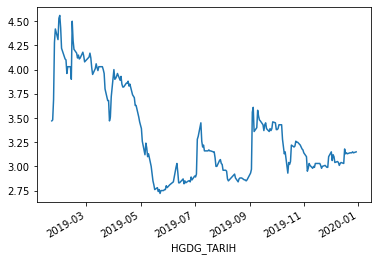

In [508]:
sm.plot_value_stock("BEYAZ", "18-01-2019", "31-12-2019")

#### median eşiğini 10'a düşür.
#### Tekil değil,belirli bir süre hacmi olanları ayır.
#### yıllık volatiliteleri bir parametre olarak al.

In [6]:
test[180].min()

0.8057553956834533

In [7]:
test[180].max()

21.502937329052223

In [284]:
def random_sampling(frame, which_day = 90, number_of_trial = 100, sample_size = 10):
    samples = []
    for i in range(number_of_trial):
        sample = random.sample(set(test[which_day]), sample_size)
        samples.append(sample)
    return samples

In [59]:
samples = random_sampling(test, 90)

In [289]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [57]:
samples[0]

[1.3472222222222219,
 1.1083495026024812,
 1.2586206896551735,
 1.046804882426853,
 1.2160039273441343,
 1.6666666666666663,
 1.3368385696568839,
 1.1074471743532919,
 4.749361474876934,
 3.138121546961325]

In [58]:
Average(samples[0])

1.7975436656765964

In [12]:
means = []
for sample in samples:
    mean = Average(sample)
    means.append(mean)

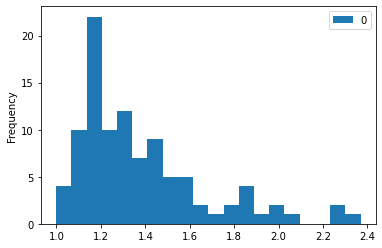

In [13]:
pd.DataFrame(means).plot(kind="hist", bins=20)

In [101]:
means

[1.8233468330106344,
 1.1103157517792084,
 1.2069780777645644,
 1.1747247849438336,
 1.0938003939674668,
 1.3809907122359535,
 1.8402065114985713,
 1.133300988339523,
 1.196710424743364,
 1.3199908934963878,
 1.2792962894156579,
 1.2755455982773778,
 1.1386469592749349,
 2.036911162204925,
 1.1322755093989927,
 1.2539612284180714,
 1.538182216933509,
 1.042555682420965,
 1.119981027590641,
 1.0653125820642453,
 1.0949964631732205,
 1.6588666607745892,
 1.1270504813469242,
 1.8983176889110893,
 1.2998085360915517,
 1.6308501473773263,
 1.0981294883618493,
 1.1227452096461448,
 1.1323532747814358,
 1.8203113939533815,
 1.4985734722784243,
 1.2038638274257925,
 1.2696485128055306,
 1.4857739249532738,
 1.0443769413690513,
 2.1691691155239536,
 1.132336531633815,
 1.0652526349500442,
 1.4079178612174963,
 1.1778722188029265,
 1.2531919338723583,
 1.660560447776541,
 1.5925960323306978,
 1.2171806189393268,
 1.0888990033311092,
 1.078138797432406,
 1.2479957854935926,
 1.4013186949207501,
 

In [159]:
def prepare_all_tables(stock_names: list, year: int, median_multiplier: int, days: list):
    """
    This function returns high volume dates of stocks and their wealth index as of the dates 
    (yüksek hacimli tarihleri ve o tarihlerden itibaren belirtilen gün kadar sonrası wealth index değerlerini)
    Args:
        main_database (frame)   : main data
        stock_names (list)      : names of specified stock to be applied
        year (int)              : reference year to be applied
        median_multiplier (int) : median threshsold for volume (ilgili yıl içindeki hacim medianının kaç katı üzeri hacimler dikkate alınacak)
        days (list)             : which days will be applied for wealth index
    Return:
        frames
    """

    all_stock_value = pd.read_pickle("stocks_values")
    
    def catch_medians(main_database, name, year, median_multiplier):
        
        main_frame = pd.concat(main_frame)
        main_frame["year"] = main_frame["HGDG_TARIH"].dt.year
        main_frame = main_frame.loc[main_frame["year"] == year]
        main_frame = main_frame[main_frame["HGDG_HS_KODU"] == name]
        main_frame["volume_series"] = main_frame.HGDG_HACIM / main_frame.SERMAYE
        median = main_frame.volume_series.median()
        main_frame = main_frame.loc[main_frame.volume_series > (median*median_multiplier)]
        test_focused_dates = list(main_frame.HGDG_TARIH)

        return test_focused_dates 
    
    def prepare_main_dataset(all_stock_value):
        main_frame = []
        for name in stockNames:
            stock = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == str(name)]
            stock["HGDG_TARIH"] = pd.to_datetime(stock["HGDG_TARIH"])
            stock = stock.sort_values(by="HGDG_TARIH")
            stock.index = stock.HGDG_TARIH
            main_frame.append(stock)
            
        return main_frame

    main_database = prepare_main_dataset(all_stock_value)
    
    def prepare_table(main_database, name, days, year, median_multiplier):
        general = []
        for date in catch_medians(main_database, name, year, median_multiplier):
            days = days
            max_values = []
            reference_date = date
            for day in days:
                start_date = reference_date  + datetime.timedelta(days=1)
                start_date = start_date.strftime("%d-%m-%Y")
                end_date = reference_date  + datetime.timedelta(days=day)
                end_date = end_date.strftime("%d-%m-%Y")
                max_value = sm.wealth_index(name, start_date, end_date).max()[1]
                max_values.append(max_value)
            max_values.append(date)
            general.append(max_values)
            df = pd.DataFrame(general)
            columns = days + ["reference_date"]
            df.columns = columns
            df["name"] = name
        return df 
    
    frames = []   
    for stock_name in stock_names:
        try:
            frame = prepare_table(main_database, stock_name, days, year, median_multiplier)
            frames.append(frame)
            print(stock_name)
        except:
            print(f"{stock_name} none")
        
    return frames

In [160]:
test = prepare_all_tables(["BURVA", "EGPRO"], 2019, 10, [7, 30, 60, 90, 120, 180])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


BURVA none
EGPRO none


In [161]:
test = sm.prepare_all_tables(["BURVA", "EGPRO"], 2019, 10, [7, 30, 60, 90, 120, 180])

AttributeError: module 'stock_module' has no attribute 'prepare_all_tables'